Trabalho final de Inteligência Computacional 

Pré-Processamento

In [1]:
# Carregando o dataset

import pandas as pd

pd.set_option('display.max_columns', None)
df = pd.read_csv('international_matches.csv')
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [3]:
# Removendo as linhas com o resultado sendo empate

df_base = df.drop(df[df['home_team_result'] == 'Draw'].index)

In [4]:
# Selecionando as featuires que serão usadas no modelo
df_treinamento = df_base[['date','home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'neutral_location', 'home_team_result']].copy()
# Setando a feature data como data
df_treinamento['date']= pd.to_datetime(df['date'])
# Criando novas colunas para ano e mês
df_treinamento['year'] = df_treinamento['date'].dt.year
df_treinamento['month'] = df_treinamento['date'].dt.month
# Removendo a feature data
df_treinamento = df_treinamento.drop('date', axis=1)
# Criando o One hot encode das features dos times
df_treinamento = pd.get_dummies(df_treinamento, columns= ['home_team', 'away_team'])

# Transformado as colunas não numéricas em numéricas 

def y_to_bool(x):
    if x == 'Win':
        return 1
    else:
        return 0

def bool_to_numeric_bool(x):
    if x == True:
        return 1
    else:
        return 0

df_treinamento['home_team_result'] = df_treinamento['home_team_result'].apply(y_to_bool)
df_treinamento['neutral_location'] = df_treinamento['neutral_location'].apply(bool_to_numeric_bool)

df_treinamento.head()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,neutral_location,home_team_result,year,month,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_American Samoa,home_team_Andorra,home_team_Angola,home_team_Anguilla,home_team_Antigua and Barbuda,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahamas,home_team_Bahrain,home_team_Bangladesh,home_team_Barbados,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bosnia and Herzegovina,home_team_Botswana,home_team_Brazil,home_team_British Virgin Islands,home_team_Brunei Darussalam,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burundi,home_team_Cabo Verde,home_team_Cambodia,home_team_Cameroon,home_team_Canada,home_team_Cayman Islands,home_team_Central African Republic,home_team_Chad,home_team_Chile,home_team_China PR,home_team_Chinese Taipei,home_team_Colombia,home_team_Comoros,home_team_Congo,home_team_Congo DR,home_team_Cook Islands,home_team_Costa Rica,home_team_Croatia,home_team_Cuba,home_team_Curaçao,home_team_Cyprus,home_team_Czech Republic,home_team_Côte d'Ivoire,home_team_Denmark,home_team_Djibouti,home_team_Dominica,home_team_Dominican Republic,home_team_Ecuador,home_team_Egypt,home_team_El Salvador,home_team_England,home_team_Equatorial Guinea,home_team_Eritrea,home_team_Estonia,home_team_Eswatini,home_team_Ethiopia,home_team_Faroe Islands,home_team_Fiji,home_team_Finland,home_team_France,home_team_Gabon,home_team_Gambia,home_team_Georgia,home_team_Germany,home_team_Ghana,home_team_Gibraltar,home_team_Greece,home_team_Grenada,home_team_Guam,home_team_Guatemala,home_team_Guinea,home_team_Guinea-Bissau,home_team_Guyana,home_team_Haiti,home_team_Honduras,home_team_Hong Kong,home_team_Hungary,home_team_IR Iran,home_team_Iceland,home_team_India,home_team_Indonesia,home_team_Iraq,home_team_Israel,home_team_Italy,home_team_Jamaica,home_team_Japan,home_team_Jordan,home_team_Kazakhstan,home_team_Kenya,home_team_Korea DPR,home_team_Korea Republic,home_team_Kosovo,home_team_Kuwait,home_team_Kyrgyz Republic,home_team_Laos,home_team_Latvia,home_team_Lebanon,home_team_Lesotho,home_team_Liberia,home_team_Libya,home_team_Liechtenstein,home_team_Lithuania,home_team_Luxembourg,home_team_Macau,home_team_Madagascar,home_team_Malawi,home_team_Malaysia,home_team_Maldives,home_team_Mali,home_team_Malta,home_team_Mauritania,home_team_Mauritius,home_team_Mexico,home_team_Moldova,home_team_Mongolia,home_team_Montenegro,home_team_Montserrat,home_team_Morocco,home_team_Mozambique,home_team_Myanmar,home_team_Namibia,home_team_Nepal,home_team_Netherlands,home_team_New Caledonia,home_team_New Zealand,home_team_Nicaragua,home_team_Niger,home_team_Nigeria,home_team_North Macedonia,home_team_Northern Ireland,home_team_Norway,home_team_Oman,home_team_Pakistan,home_team_Palestine,home_team_Panama,home_team_Papua New Guinea,home_team_Paraguay,home_team_Peru,home_team_Philippines,home_team_Poland,home_team_Portugal,home_team_Puerto Rico,home_team_Qatar,home_team_Republic of Ireland,home_team_Romania,home_team_Russia,home_team_Rwanda,home_team_Samoa,home_team_San Marino,home_team_Saudi Arabia,home_team_Scotland,home_team_Senegal,home_team_Serbia,home_team_Seychelles,home_team_Sierra Leone,home_team_Singapore,home_team_Slovakia,home_team_Slovenia,home_team_Solomon Islands,home_team_Somalia,home_team_South Africa,home_team_South Sudan,home_team_Spain,home_team_Sri Lanka,home_team_St. Kitts and Nevis,home_team_St. Lucia,home_team_St. Vincent and the Grenadines,home_team_Sudan,home_team_Suriname,home_team_Sweden,home_team_Switzerland,home_team_Syria,home_team_São Tomé and Príncipe,home_team_Tahiti,home_team_Tajikistan,home_team_Tanzania,home_team_Thailand,home_team_Timor-Leste,home_team_Togo,home_team_Tonga,home_team_Trinidad and Tobago,home_team_Tunisia,home_team_Turkey,home_team_Turkmenistan,h

In [5]:
# Separando as features do target

X_train = df_treinamento.drop('home_team_result', axis=1)
y_train = df_treinamento['home_team_result']

In [6]:
# Mostrando a correlação entre as features e o target

fields = list(X_train)  
correlations = df_treinamento[fields].corrwith(y_train)
correlations.sort_values(inplace=True)
for corr,value in correlations.items() :
    print(corr,'\t\t',value)

home_team_fifa_rank 		 -0.23492939755725595
neutral_location 		 -0.09806195803192112
home_team_San Marino 		 -0.08726430043358903
away_team_total_fifa_points 		 -0.08022506758147877
away_team_Brazil 		 -0.07797229481438778
home_team_Luxembourg 		 -0.07645724090865705
away_team_Spain 		 -0.07337961794073405
home_team_Liechtenstein 		 -0.07266731688800573
home_team_Andorra 		 -0.0722501078874184
away_team_Germany 		 -0.06957164828234247
home_team_Malta 		 -0.06908673157168456
away_team_France 		 -0.0653701237278328
away_team_Netherlands 		 -0.0578259283349451
away_team_England 		 -0.0518020662049202
away_team_IR Iran 		 -0.05107069447213921
away_team_Portugal 		 -0.05078167786465445
home_team_Faroe Islands 		 -0.05071845526397357
home_team_Moldova 		 -0.04917624273599698
away_team_Argentina 		 -0.04899086177098442
away_team_Italy 		 -0.04852932557508534
away_team_Croatia 		 -0.046998974352003675
home_team_Djibouti 		 -0.042979745369184655
away_team_Japan 		 -0.04141637706714801
home_team

Regressão logística

In [7]:
# Treinando o modelo

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV

LR_L2 = LogisticRegressionCV(Cs=5, cv=4, max_iter=10000, penalty='l2').fit(X_train, y_train)

In [8]:
# Verificando a acurácia do modelo treinado

scores = cross_val_score(LR_L2, X_train, y_train, cv=5)
scores.mean()

0.7502705969992157

SVM

In [9]:
# Otimizando o SVM

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

GSVC = SVC(kernel='rbf')
param_grid = {
    'C': [.5,1, 2]
}

grid_search = GridSearchCV(GSVC, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 2}
0.7126596890594411


In [10]:
# Verificando a acurácia do modelo treinado

GSVC = SVC(kernel='rbf', C=2, probability=True)
scores = cross_val_score(GSVC, X_train, y_train, cv=5, n_jobs=-1)
scores.mean()

0.7298205099350408

Random Forest

In [11]:
# Otimizando o Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'min_samples_split': [0.5, 2, 3],
    'max_depth': [4, 5, 6, 7, 9, None]
}

grid_search = GridSearchCV(rf, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 9, 'min_samples_split': 3, 'n_estimators': 250}
0.6857885447882133


In [12]:
# Verificando a acurácia do modelo treinado

rf = RandomForestClassifier(max_depth= 9, min_samples_split = 2, n_estimators = 250)
scores = cross_val_score(rf, X_train, y_train, cv=5)
scores.mean()

0.6678200152538822

AdaBoost

In [13]:
# Otimizando o AdaBoost

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ABC = AdaBoostClassifier(DecisionTreeClassifier(max_features=4))

param_grid = {'n_estimators': [100, 150, 200, 250],
              'learning_rate': [0.01, 0.001]}

GV_ABC = GridSearchCV(ABC,
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

GV_ABC = GV_ABC.fit(X_train, y_train)

print(GV_ABC.best_params_)
print(GV_ABC.best_score_)
print(GV_ABC.best_estimator_)

{'learning_rate': 0.01, 'n_estimators': 250}
0.6922617920239869
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_features=4),
                   learning_rate=0.01, n_estimators=250)


In [14]:
# Verificando a acurácia do modelo treinado

ABC = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_features=4),
                   learning_rate=0.01, n_estimators=250)
scores = cross_val_score(ABC, X_train, y_train, cv=5)
scores.mean()

0.6876745341546185

XGBoost

In [15]:
# Otimizando o XGBoost

from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier()

param_grid = {
    'eta': [0.1, 0.2, 0.3, 0.4, 0.5],
    'gamma': [10, 100, 200, 300, 400],
    'max_depth': [4, 5, 6, 7, 9]
}

grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

e:\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
e:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
e:\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:47:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'eta': 0.3, 'gamma': 100, 'max_depth': 4}
0.7388846760921858


In [16]:
# Verificando a acurácia do modelo treinado

xgb = XGBClassifier(eta=0.3, gamma=100, max_depth=4)
scores = cross_val_score(xgb, X_train, y_train, cv=5)
scores.mean()

[10:47:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


e:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
e:\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
e:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; a

[10:47:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


e:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
e:\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:47:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


e:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
e:\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:47:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


e:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
e:\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:47:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7323562967976309

Voting

In [17]:
# Verificando a acurácia do Voting

from sklearn.ensemble import VotingClassifier

estimators = [('LR_L2', LR_L2), ('GSVC', GSVC), ('rf', rf), ('ABC', ABC), ('xgb', xgb)]
VC = VotingClassifier(estimators, voting='soft', n_jobs=-1)
scores = cross_val_score(VC, X_train, y_train, cv=3)
scores.mean()

0.7306288261614554

In [18]:
# Dividindo o conjunto de treinamento parar calcular as métricas

from sklearn.model_selection import train_test_split

train_metrics, validation_metrics = train_test_split(df_treinamento, test_size=0.2)

X_train_metrics = train_metrics.drop('home_team_result', axis=1)
y_train_metrics = train_metrics['home_team_result']

X_validation_metrics = validation_metrics.drop('home_team_result', axis=1)
y_validation_metrics= validation_metrics['home_team_result']

In [19]:
# Calculando as métricas

from sklearn.metrics import classification_report

VC = VotingClassifier(estimators, voting='soft', n_jobs=-1)
VC = VC.fit(X_train_metrics, y_train_metrics)
y_pred_metrics = VC.predict(X_validation_metrics)

print(classification_report(y_validation_metrics, y_pred_metrics))

              precision    recall  f1-score   support

           0       0.72      0.54      0.62      1322
           1       0.78      0.88      0.83      2385

    accuracy                           0.76      3707
   macro avg       0.75      0.71      0.72      3707
weighted avg       0.76      0.76      0.75      3707



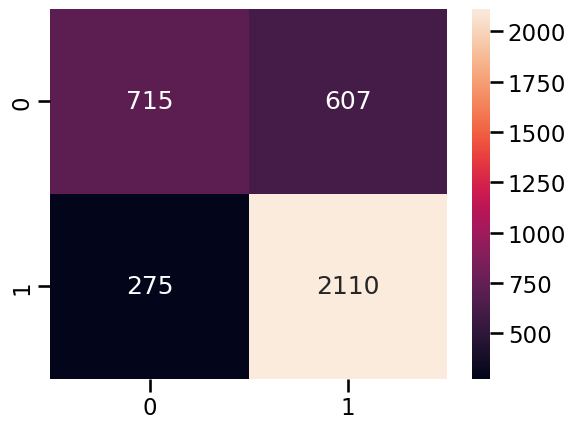

In [20]:
# Plotando a matriz de cnfusão

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
cm = confusion_matrix(y_validation_metrics, y_pred_metrics)
ax = sns.heatmap(cm, annot=True, fmt='d')

In [21]:
# Treinando o modelo com todo o conjunto de dados

VC = VotingClassifier(estimators, voting='soft', n_jobs=-1)
VC = VC.fit(X_train, y_train)

In [22]:
# Calculando o erro de treinamento

from sklearn.metrics import accuracy_score

y_pred = VC.predict(X_train)
accuracy_score(y_train, y_pred)

0.8799913662853442

Predições para a copa

In [26]:
# carregando o dataset dos jogos da fase de grupos

df_grupos = pd.read_excel('jogos_fase_grupos_numeric.xlsx')
df_grupos.head()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,neutral_location,year,month,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_American Samoa,home_team_Andorra,home_team_Angola,home_team_Anguilla,home_team_Antigua and Barbuda,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahamas,home_team_Bahrain,home_team_Bangladesh,home_team_Barbados,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bosnia and Herzegovina,home_team_Botswana,home_team_Brazil,home_team_British Virgin Islands,home_team_Brunei Darussalam,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burundi,home_team_Cabo Verde,home_team_Cambodia,home_team_Cameroon,home_team_Canada,home_team_Cayman Islands,home_team_Central African Republic,home_team_Chad,home_team_Chile,home_team_China PR,home_team_Chinese Taipei,home_team_Colombia,home_team_Comoros,home_team_Congo,home_team_Congo DR,home_team_Cook Islands,home_team_Costa Rica,home_team_Croatia,home_team_Cuba,home_team_Curaçao,home_team_Cyprus,home_team_Czech Republic,home_team_Côte d'Ivoire,home_team_Denmark,home_team_Djibouti,home_team_Dominica,home_team_Dominican Republic,home_team_Ecuador,home_team_Egypt,home_team_El Salvador,home_team_England,home_team_Equatorial Guinea,home_team_Eritrea,home_team_Estonia,home_team_Eswatini,home_team_Ethiopia,home_team_Faroe Islands,home_team_Fiji,home_team_Finland,home_team_France,home_team_Gabon,home_team_Gambia,home_team_Georgia,home_team_Germany,home_team_Ghana,home_team_Gibraltar,home_team_Greece,home_team_Grenada,home_team_Guam,home_team_Guatemala,home_team_Guinea,home_team_Guinea-Bissau,home_team_Guyana,home_team_Haiti,home_team_Honduras,home_team_Hong Kong,home_team_Hungary,home_team_IR Iran,home_team_Iceland,home_team_India,home_team_Indonesia,home_team_Iraq,home_team_Israel,home_team_Italy,home_team_Jamaica,home_team_Japan,home_team_Jordan,home_team_Kazakhstan,home_team_Kenya,home_team_Korea DPR,home_team_Korea Republic,home_team_Kosovo,home_team_Kuwait,home_team_Kyrgyz Republic,home_team_Laos,home_team_Latvia,home_team_Lebanon,home_team_Lesotho,home_team_Liberia,home_team_Libya,home_team_Liechtenstein,home_team_Lithuania,home_team_Luxembourg,home_team_Macau,home_team_Madagascar,home_team_Malawi,home_team_Malaysia,home_team_Maldives,home_team_Mali,home_team_Malta,home_team_Mauritania,home_team_Mauritius,home_team_Mexico,home_team_Moldova,home_team_Mongolia,home_team_Montenegro,home_team_Montserrat,home_team_Morocco,home_team_Mozambique,home_team_Myanmar,home_team_Namibia,home_team_Nepal,home_team_Netherlands,home_team_New Caledonia,home_team_New Zealand,home_team_Nicaragua,home_team_Niger,home_team_Nigeria,home_team_North Macedonia,home_team_Northern Ireland,home_team_Norway,home_team_Oman,home_team_Pakistan,home_team_Palestine,home_team_Panama,home_team_Papua New Guinea,home_team_Paraguay,home_team_Peru,home_team_Philippines,home_team_Poland,home_team_Portugal,home_team_Puerto Rico,home_team_Qatar,home_team_Republic of Ireland,home_team_Romania,home_team_Russia,home_team_Rwanda,home_team_Samoa,home_team_San Marino,home_team_Saudi Arabia,home_team_Scotland,home_team_Senegal,home_team_Serbia,home_team_Seychelles,home_team_Sierra Leone,home_team_Singapore,home_team_Slovakia,home_team_Slovenia,home_team_Solomon Islands,home_team_Somalia,home_team_South Africa,home_team_South Sudan,home_team_Spain,home_team_Sri Lanka,home_team_St. Kitts and Nevis,home_team_St. Lucia,home_team_St. Vincent and the Grenadines,home_team_Sudan,home_team_Suriname,home_team_Sweden,home_team_Switzerland,home_team_Syria,home_team_São Tomé and Príncipe,home_team_Tahiti,home_team_Tajikistan,home_team_Tanzania,home_team_Thailand,home_team_Timor-Leste,home_team_Togo,home_team_Tonga,home_team_Trinidad and Tobago,home_team_Tunisia,home_team_Turkey,home_team_Turkmenistan,home_team_Turks an

In [27]:
# Fazendo as predições

y_predict = VC.predict(df_grupos)
print(y_predict)

[1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1
 1 0 1 0 1 1 1 1 1 1 0]


Seleções classificadas paras as oitavas de final de acordo com a predição do modelo

![title](classificados8.png)

In [28]:
# carregando o dataset dos jogos das oitavas

df_grupos = pd.read_excel('jogos_oitavas_numeric.xlsx')
df_grupos.head()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,neutral_location,year,month,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_American Samoa,home_team_Andorra,home_team_Angola,home_team_Anguilla,home_team_Antigua and Barbuda,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahamas,home_team_Bahrain,home_team_Bangladesh,home_team_Barbados,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bosnia and Herzegovina,home_team_Botswana,home_team_Brazil,home_team_British Virgin Islands,home_team_Brunei Darussalam,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burundi,home_team_Cabo Verde,home_team_Cambodia,home_team_Cameroon,home_team_Canada,home_team_Cayman Islands,home_team_Central African Republic,home_team_Chad,home_team_Chile,home_team_China PR,home_team_Chinese Taipei,home_team_Colombia,home_team_Comoros,home_team_Congo,home_team_Congo DR,home_team_Cook Islands,home_team_Costa Rica,home_team_Croatia,home_team_Cuba,home_team_Curaçao,home_team_Cyprus,home_team_Czech Republic,home_team_Côte d'Ivoire,home_team_Denmark,home_team_Djibouti,home_team_Dominica,home_team_Dominican Republic,home_team_Ecuador,home_team_Egypt,home_team_El Salvador,home_team_England,home_team_Equatorial Guinea,home_team_Eritrea,home_team_Estonia,home_team_Eswatini,home_team_Ethiopia,home_team_Faroe Islands,home_team_Fiji,home_team_Finland,home_team_France,home_team_Gabon,home_team_Gambia,home_team_Georgia,home_team_Germany,home_team_Ghana,home_team_Gibraltar,home_team_Greece,home_team_Grenada,home_team_Guam,home_team_Guatemala,home_team_Guinea,home_team_Guinea-Bissau,home_team_Guyana,home_team_Haiti,home_team_Honduras,home_team_Hong Kong,home_team_Hungary,home_team_IR Iran,home_team_Iceland,home_team_India,home_team_Indonesia,home_team_Iraq,home_team_Israel,home_team_Italy,home_team_Jamaica,home_team_Japan,home_team_Jordan,home_team_Kazakhstan,home_team_Kenya,home_team_Korea DPR,home_team_Korea Republic,home_team_Kosovo,home_team_Kuwait,home_team_Kyrgyz Republic,home_team_Laos,home_team_Latvia,home_team_Lebanon,home_team_Lesotho,home_team_Liberia,home_team_Libya,home_team_Liechtenstein,home_team_Lithuania,home_team_Luxembourg,home_team_Macau,home_team_Madagascar,home_team_Malawi,home_team_Malaysia,home_team_Maldives,home_team_Mali,home_team_Malta,home_team_Mauritania,home_team_Mauritius,home_team_Mexico,home_team_Moldova,home_team_Mongolia,home_team_Montenegro,home_team_Montserrat,home_team_Morocco,home_team_Mozambique,home_team_Myanmar,home_team_Namibia,home_team_Nepal,home_team_Netherlands,home_team_New Caledonia,home_team_New Zealand,home_team_Nicaragua,home_team_Niger,home_team_Nigeria,home_team_North Macedonia,home_team_Northern Ireland,home_team_Norway,home_team_Oman,home_team_Pakistan,home_team_Palestine,home_team_Panama,home_team_Papua New Guinea,home_team_Paraguay,home_team_Peru,home_team_Philippines,home_team_Poland,home_team_Portugal,home_team_Puerto Rico,home_team_Qatar,home_team_Republic of Ireland,home_team_Romania,home_team_Russia,home_team_Rwanda,home_team_Samoa,home_team_San Marino,home_team_Saudi Arabia,home_team_Scotland,home_team_Senegal,home_team_Serbia,home_team_Seychelles,home_team_Sierra Leone,home_team_Singapore,home_team_Slovakia,home_team_Slovenia,home_team_Solomon Islands,home_team_Somalia,home_team_South Africa,home_team_South Sudan,home_team_Spain,home_team_Sri Lanka,home_team_St. Kitts and Nevis,home_team_St. Lucia,home_team_St. Vincent and the Grenadines,home_team_Sudan,home_team_Suriname,home_team_Sweden,home_team_Switzerland,home_team_Syria,home_team_São Tomé and Príncipe,home_team_Tahiti,home_team_Tajikistan,home_team_Tanzania,home_team_Thailand,home_team_Timor-Leste,home_team_Togo,home_team_Tonga,home_team_Trinidad and Tobago,home_team_Tunisia,home_team_Turkey,home_team_Turkmenistan,home_team_Turks an

In [29]:
# Fazendo as predições

y_predict = VC.predict(df_grupos)
print(y_predict)

[1 1 1 1 0 1 1 1]


Seleções classificadas paras as quartas de final de acordo com a predição do modelo

![title](classificados4.png)

In [30]:
# carregando o dataset dos jogos das quartas

df_grupos = pd.read_excel('jogos_quartas_numeric.xlsx')
df_grupos.head()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,neutral_location,year,month,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_American Samoa,home_team_Andorra,home_team_Angola,home_team_Anguilla,home_team_Antigua and Barbuda,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahamas,home_team_Bahrain,home_team_Bangladesh,home_team_Barbados,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bosnia and Herzegovina,home_team_Botswana,home_team_Brazil,home_team_British Virgin Islands,home_team_Brunei Darussalam,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burundi,home_team_Cabo Verde,home_team_Cambodia,home_team_Cameroon,home_team_Canada,home_team_Cayman Islands,home_team_Central African Republic,home_team_Chad,home_team_Chile,home_team_China PR,home_team_Chinese Taipei,home_team_Colombia,home_team_Comoros,home_team_Congo,home_team_Congo DR,home_team_Cook Islands,home_team_Costa Rica,home_team_Croatia,home_team_Cuba,home_team_Curaçao,home_team_Cyprus,home_team_Czech Republic,home_team_Côte d'Ivoire,home_team_Denmark,home_team_Djibouti,home_team_Dominica,home_team_Dominican Republic,home_team_Ecuador,home_team_Egypt,home_team_El Salvador,home_team_England,home_team_Equatorial Guinea,home_team_Eritrea,home_team_Estonia,home_team_Eswatini,home_team_Ethiopia,home_team_Faroe Islands,home_team_Fiji,home_team_Finland,home_team_France,home_team_Gabon,home_team_Gambia,home_team_Georgia,home_team_Germany,home_team_Ghana,home_team_Gibraltar,home_team_Greece,home_team_Grenada,home_team_Guam,home_team_Guatemala,home_team_Guinea,home_team_Guinea-Bissau,home_team_Guyana,home_team_Haiti,home_team_Honduras,home_team_Hong Kong,home_team_Hungary,home_team_IR Iran,home_team_Iceland,home_team_India,home_team_Indonesia,home_team_Iraq,home_team_Israel,home_team_Italy,home_team_Jamaica,home_team_Japan,home_team_Jordan,home_team_Kazakhstan,home_team_Kenya,home_team_Korea DPR,home_team_Korea Republic,home_team_Kosovo,home_team_Kuwait,home_team_Kyrgyz Republic,home_team_Laos,home_team_Latvia,home_team_Lebanon,home_team_Lesotho,home_team_Liberia,home_team_Libya,home_team_Liechtenstein,home_team_Lithuania,home_team_Luxembourg,home_team_Macau,home_team_Madagascar,home_team_Malawi,home_team_Malaysia,home_team_Maldives,home_team_Mali,home_team_Malta,home_team_Mauritania,home_team_Mauritius,home_team_Mexico,home_team_Moldova,home_team_Mongolia,home_team_Montenegro,home_team_Montserrat,home_team_Morocco,home_team_Mozambique,home_team_Myanmar,home_team_Namibia,home_team_Nepal,home_team_Netherlands,home_team_New Caledonia,home_team_New Zealand,home_team_Nicaragua,home_team_Niger,home_team_Nigeria,home_team_North Macedonia,home_team_Northern Ireland,home_team_Norway,home_team_Oman,home_team_Pakistan,home_team_Palestine,home_team_Panama,home_team_Papua New Guinea,home_team_Paraguay,home_team_Peru,home_team_Philippines,home_team_Poland,home_team_Portugal,home_team_Puerto Rico,home_team_Qatar,home_team_Republic of Ireland,home_team_Romania,home_team_Russia,home_team_Rwanda,home_team_Samoa,home_team_San Marino,home_team_Saudi Arabia,home_team_Scotland,home_team_Senegal,home_team_Serbia,home_team_Seychelles,home_team_Sierra Leone,home_team_Singapore,home_team_Slovakia,home_team_Slovenia,home_team_Solomon Islands,home_team_Somalia,home_team_South Africa,home_team_South Sudan,home_team_Spain,home_team_Sri Lanka,home_team_St. Kitts and Nevis,home_team_St. Lucia,home_team_St. Vincent and the Grenadines,home_team_Sudan,home_team_Suriname,home_team_Sweden,home_team_Switzerland,home_team_Syria,home_team_São Tomé and Príncipe,home_team_Tahiti,home_team_Tajikistan,home_team_Tanzania,home_team_Thailand,home_team_Timor-Leste,home_team_Togo,home_team_Tonga,home_team_Trinidad and Tobago,home_team_Tunisia,home_team_Turkey,home_team_Turkmenistan,home_team_Turks an

In [31]:
# Fazendo as predições

y_predict = VC.predict(df_grupos)
print(y_predict)

[0 1 0 0]


Seleções classificadas paras as semi-finais de acordo com a predição do modelo

![title](classificados2.png)

In [32]:
# carregando o dataset dos jogos das semi

df_grupos = pd.read_excel('jogos_semi_numeric.xlsx')
df_grupos.head()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,neutral_location,year,month,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_American Samoa,home_team_Andorra,home_team_Angola,home_team_Anguilla,home_team_Antigua and Barbuda,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahamas,home_team_Bahrain,home_team_Bangladesh,home_team_Barbados,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bosnia and Herzegovina,home_team_Botswana,home_team_Brazil,home_team_British Virgin Islands,home_team_Brunei Darussalam,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burundi,home_team_Cabo Verde,home_team_Cambodia,home_team_Cameroon,home_team_Canada,home_team_Cayman Islands,home_team_Central African Republic,home_team_Chad,home_team_Chile,home_team_China PR,home_team_Chinese Taipei,home_team_Colombia,home_team_Comoros,home_team_Congo,home_team_Congo DR,home_team_Cook Islands,home_team_Costa Rica,home_team_Croatia,home_team_Cuba,home_team_Curaçao,home_team_Cyprus,home_team_Czech Republic,home_team_Côte d'Ivoire,home_team_Denmark,home_team_Djibouti,home_team_Dominica,home_team_Dominican Republic,home_team_Ecuador,home_team_Egypt,home_team_El Salvador,home_team_England,home_team_Equatorial Guinea,home_team_Eritrea,home_team_Estonia,home_team_Eswatini,home_team_Ethiopia,home_team_Faroe Islands,home_team_Fiji,home_team_Finland,home_team_France,home_team_Gabon,home_team_Gambia,home_team_Georgia,home_team_Germany,home_team_Ghana,home_team_Gibraltar,home_team_Greece,home_team_Grenada,home_team_Guam,home_team_Guatemala,home_team_Guinea,home_team_Guinea-Bissau,home_team_Guyana,home_team_Haiti,home_team_Honduras,home_team_Hong Kong,home_team_Hungary,home_team_IR Iran,home_team_Iceland,home_team_India,home_team_Indonesia,home_team_Iraq,home_team_Israel,home_team_Italy,home_team_Jamaica,home_team_Japan,home_team_Jordan,home_team_Kazakhstan,home_team_Kenya,home_team_Korea DPR,home_team_Korea Republic,home_team_Kosovo,home_team_Kuwait,home_team_Kyrgyz Republic,home_team_Laos,home_team_Latvia,home_team_Lebanon,home_team_Lesotho,home_team_Liberia,home_team_Libya,home_team_Liechtenstein,home_team_Lithuania,home_team_Luxembourg,home_team_Macau,home_team_Madagascar,home_team_Malawi,home_team_Malaysia,home_team_Maldives,home_team_Mali,home_team_Malta,home_team_Mauritania,home_team_Mauritius,home_team_Mexico,home_team_Moldova,home_team_Mongolia,home_team_Montenegro,home_team_Montserrat,home_team_Morocco,home_team_Mozambique,home_team_Myanmar,home_team_Namibia,home_team_Nepal,home_team_Netherlands,home_team_New Caledonia,home_team_New Zealand,home_team_Nicaragua,home_team_Niger,home_team_Nigeria,home_team_North Macedonia,home_team_Northern Ireland,home_team_Norway,home_team_Oman,home_team_Pakistan,home_team_Palestine,home_team_Panama,home_team_Papua New Guinea,home_team_Paraguay,home_team_Peru,home_team_Philippines,home_team_Poland,home_team_Portugal,home_team_Puerto Rico,home_team_Qatar,home_team_Republic of Ireland,home_team_Romania,home_team_Russia,home_team_Rwanda,home_team_Samoa,home_team_San Marino,home_team_Saudi Arabia,home_team_Scotland,home_team_Senegal,home_team_Serbia,home_team_Seychelles,home_team_Sierra Leone,home_team_Singapore,home_team_Slovakia,home_team_Slovenia,home_team_Solomon Islands,home_team_Somalia,home_team_South Africa,home_team_South Sudan,home_team_Spain,home_team_Sri Lanka,home_team_St. Kitts and Nevis,home_team_St. Lucia,home_team_St. Vincent and the Grenadines,home_team_Sudan,home_team_Suriname,home_team_Sweden,home_team_Switzerland,home_team_Syria,home_team_São Tomé and Príncipe,home_team_Tahiti,home_team_Tajikistan,home_team_Tanzania,home_team_Thailand,home_team_Timor-Leste,home_team_Togo,home_team_Tonga,home_team_Trinidad and Tobago,home_team_Tunisia,home_team_Turkey,home_team_Turkmenistan,home_team_Turks an

In [33]:
# Fazendo as predições

y_predict = VC.predict(df_grupos)
print(y_predict)

[0 1]


Seleções classificadas para a final de acordo com a predição do modelo

![title](classificados1.png)

In [34]:
# carregando o dataset da final

df_grupos = pd.read_excel('jogos_final_numeric.xlsx')
df_grupos.head()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,neutral_location,year,month,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_American Samoa,home_team_Andorra,home_team_Angola,home_team_Anguilla,home_team_Antigua and Barbuda,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahamas,home_team_Bahrain,home_team_Bangladesh,home_team_Barbados,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bosnia and Herzegovina,home_team_Botswana,home_team_Brazil,home_team_British Virgin Islands,home_team_Brunei Darussalam,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burundi,home_team_Cabo Verde,home_team_Cambodia,home_team_Cameroon,home_team_Canada,home_team_Cayman Islands,home_team_Central African Republic,home_team_Chad,home_team_Chile,home_team_China PR,home_team_Chinese Taipei,home_team_Colombia,home_team_Comoros,home_team_Congo,home_team_Congo DR,home_team_Cook Islands,home_team_Costa Rica,home_team_Croatia,home_team_Cuba,home_team_Curaçao,home_team_Cyprus,home_team_Czech Republic,home_team_Côte d'Ivoire,home_team_Denmark,home_team_Djibouti,home_team_Dominica,home_team_Dominican Republic,home_team_Ecuador,home_team_Egypt,home_team_El Salvador,home_team_England,home_team_Equatorial Guinea,home_team_Eritrea,home_team_Estonia,home_team_Eswatini,home_team_Ethiopia,home_team_Faroe Islands,home_team_Fiji,home_team_Finland,home_team_France,home_team_Gabon,home_team_Gambia,home_team_Georgia,home_team_Germany,home_team_Ghana,home_team_Gibraltar,home_team_Greece,home_team_Grenada,home_team_Guam,home_team_Guatemala,home_team_Guinea,home_team_Guinea-Bissau,home_team_Guyana,home_team_Haiti,home_team_Honduras,home_team_Hong Kong,home_team_Hungary,home_team_IR Iran,home_team_Iceland,home_team_India,home_team_Indonesia,home_team_Iraq,home_team_Israel,home_team_Italy,home_team_Jamaica,home_team_Japan,home_team_Jordan,home_team_Kazakhstan,home_team_Kenya,home_team_Korea DPR,home_team_Korea Republic,home_team_Kosovo,home_team_Kuwait,home_team_Kyrgyz Republic,home_team_Laos,home_team_Latvia,home_team_Lebanon,home_team_Lesotho,home_team_Liberia,home_team_Libya,home_team_Liechtenstein,home_team_Lithuania,home_team_Luxembourg,home_team_Macau,home_team_Madagascar,home_team_Malawi,home_team_Malaysia,home_team_Maldives,home_team_Mali,home_team_Malta,home_team_Mauritania,home_team_Mauritius,home_team_Mexico,home_team_Moldova,home_team_Mongolia,home_team_Montenegro,home_team_Montserrat,home_team_Morocco,home_team_Mozambique,home_team_Myanmar,home_team_Namibia,home_team_Nepal,home_team_Netherlands,home_team_New Caledonia,home_team_New Zealand,home_team_Nicaragua,home_team_Niger,home_team_Nigeria,home_team_North Macedonia,home_team_Northern Ireland,home_team_Norway,home_team_Oman,home_team_Pakistan,home_team_Palestine,home_team_Panama,home_team_Papua New Guinea,home_team_Paraguay,home_team_Peru,home_team_Philippines,home_team_Poland,home_team_Portugal,home_team_Puerto Rico,home_team_Qatar,home_team_Republic of Ireland,home_team_Romania,home_team_Russia,home_team_Rwanda,home_team_Samoa,home_team_San Marino,home_team_Saudi Arabia,home_team_Scotland,home_team_Senegal,home_team_Serbia,home_team_Seychelles,home_team_Sierra Leone,home_team_Singapore,home_team_Slovakia,home_team_Slovenia,home_team_Solomon Islands,home_team_Somalia,home_team_South Africa,home_team_South Sudan,home_team_Spain,home_team_Sri Lanka,home_team_St. Kitts and Nevis,home_team_St. Lucia,home_team_St. Vincent and the Grenadines,home_team_Sudan,home_team_Suriname,home_team_Sweden,home_team_Switzerland,home_team_Syria,home_team_São Tomé and Príncipe,home_team_Tahiti,home_team_Tajikistan,home_team_Tanzania,home_team_Thailand,home_team_Timor-Leste,home_team_Togo,home_team_Tonga,home_team_Trinidad and Tobago,home_team_Tunisia,home_team_Turkey,home_team_Turkmenistan,home_team_Turks an

In [35]:
# Fazendo as predições

y_predict = VC.predict(df_grupos)
print(y_predict)

[0]


Seleção campeã de acordo com a predição do modelo

![title](campeao.png)